In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('Churn_Modelling (1).csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited', ylabel='IsActiveMember'>

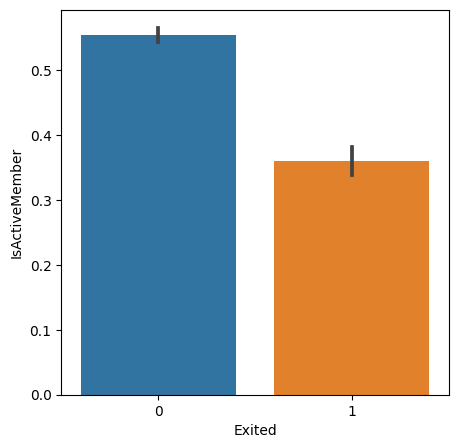

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Exited', y = 'IsActiveMember', data = data)

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

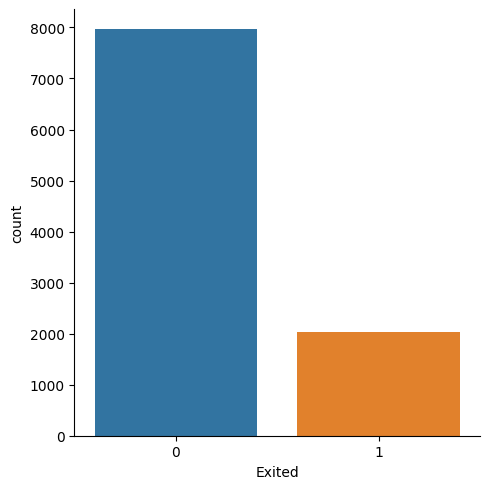

In [ ]:
sns.catplot(x='Exited', data = data, kind = 'count')

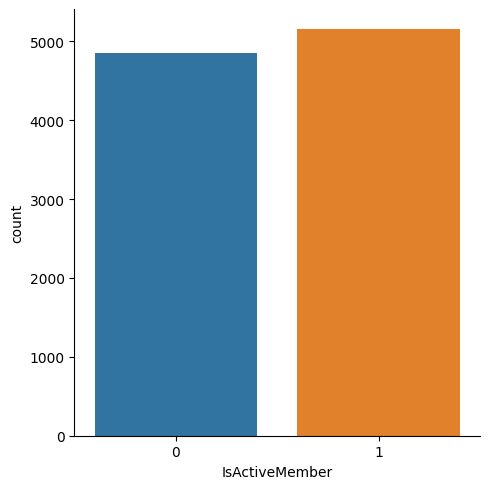

In [ ]:
sns.catplot(x='IsActiveMember', data = data, kind = 'count')

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

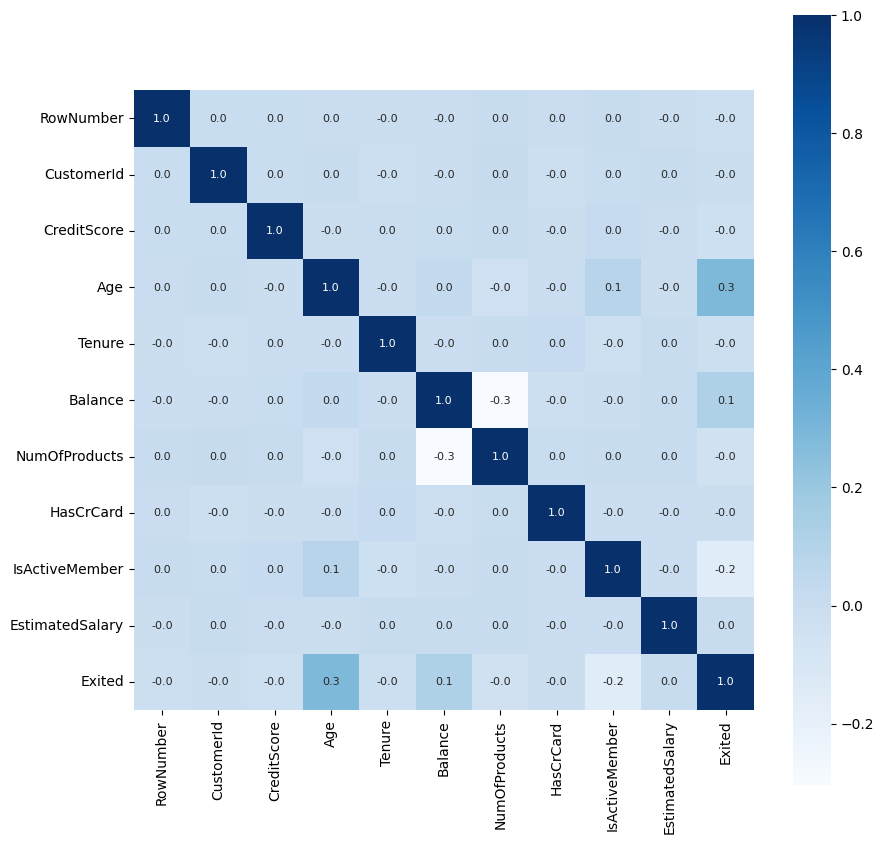

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Geography'] = encoder.fit_transform(data['Geography'])

data['Gender'] = encoder.fit_transform(data['Gender'])
data['Surname'] = encoder.fit_transform(data['Surname'])


In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = data.drop(columns='Exited', axis=1)
Y = data['Exited']

In [ ]:
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5291,5292,15575510,1803,659,0,0,32,2,155584.21,1,0,1,153662.88
8771,8772,15621093,2587,681,1,1,31,4,97338.19,2,0,0,48226.76
35,36,15794171,1587,475,0,0,45,0,134264.04,1,1,0,27822.99
1255,1256,15615032,2142,624,2,1,46,3,0.00,2,1,1,62825.03
3266,3267,15779744,532,537,2,1,30,1,103138.17,1,1,1,96555.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,6401,15585907,591,676,2,0,30,5,0.00,2,0,0,179066.58
9160,9161,15753679,1875,778,0,1,24,4,0.00,2,1,1,162809.20
9859,9860,15615430,14,678,1,1,55,4,129646.91,1,1,1,184125.10
1688,1689,15804610,2705,601,0,0,41,1,0.00,2,0,1,160607.06


In [ ]:
Y_train

5291    0
8771    0
35      1
1255    0
3266    0
       ..
6400    0
9160    0
9859    1
1688    0
5994    0
Name: Exited, Length: 8000, dtype: int64

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(10000, 13) (8000, 13) (2000, 13)


In [ ]:
lr = LogisticRegression()
print(lr.fit(X_train,Y_train))

rf = RandomForestClassifier()
print(rf.fit(X_train,Y_train))


xg = XGBClassifier()
print(xg.fit(X_train,Y_train))

sm = SVC()
print(sm.fit(X_train,Y_train))

LogisticRegression()
RandomForestClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
SVC()


In [ ]:
X_train_prediction=lr.predict(X_train)
train_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy:',train_data_accuracy)

Accuracy: 0.79475


In [ ]:
X_test_prediction=lr.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.8025


In [ ]:
X_train_pred=rf.predict(X_train)
train_data_accuracy=accuracy_score(X_train_pred,Y_train)

In [ ]:
print('Accuracy:',train_data_accuracy)

Accuracy: 0.999875


In [ ]:
X_test_pred=rf.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [ ]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.861


In [ ]:
X_train_pred1=xg.predict(X_train)
train_data_accuracy=accuracy_score(X_train_pred1,Y_train)

In [ ]:
print('Accuracy:',train_data_accuracy)

Accuracy: 0.97475


In [ ]:
X_test_pred1=xg.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred1,Y_test)

In [ ]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.848


In [ ]:
X_train_pred2=sm.predict(X_train)
train_data_accuracy=accuracy_score(X_train_pred2,Y_train)

In [ ]:
print('acccuracy:',train_data_accuracy)

acccuracy: 0.79475


In [ ]:
X_test_pred2=sm.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred2,Y_test)

In [ ]:
print('accuracy:',test_data_accuracy)

accuracy: 0.8025


In [ ]:
final_data=pd.DataFrame({'Models':['lr','rf','xg','sm'],
              'ACC':[accuracy_score(Y_test,X_test_prediction)*100,
                     accuracy_score(Y_test,X_test_pred)*100,
                     accuracy_score(Y_test,X_test_pred1)*100,
                     accuracy_score(Y_test,X_test_pred2)*100,]})


In [ ]:
final_data

,Models,ACC
0,lr,80.25
1,rf,86.10
2,xg,84.80
3,sm,80.25


In [ ]:
print(classification_report(Y_test,X_test_prediction))
print(classification_report(Y_test,X_test_pred))
print(classification_report(Y_test,X_test_pred1))
print(classification_report(Y_test,X_test_pred2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1605
           1       0.00      0.00      0.00       395

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1605
           1       0.76      0.43      0.55       395

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1605
           1       0.67      0.46      0.54       395

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.85      0.84      2000

              preci

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[1605    0]
 [ 395    0]]


<Axes: >

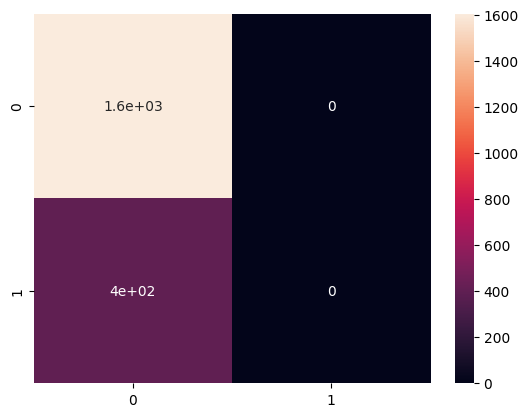

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

[0.08147637 0.08135209 0.08008793 0.08199654 0.04080024 0.01787295
 0.18191384 0.07268875 0.08854027 0.13534799 0.02283144 0.0344865
 0.08060507]


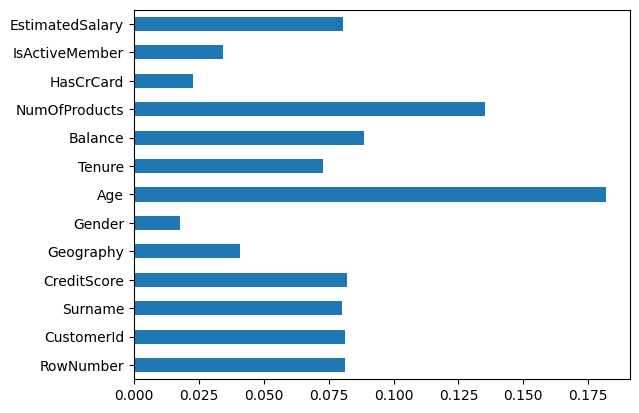

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()